[****](http://) (EDA) NBA Playoffs Scoring: *Michael Jordan*, *Kobe Bryant*, *LeBron James* (as of 2018)
-------------------------------------------------------------------------------------------------------------------


![](https://cdn.tiebreaker.com/wp-content/uploads/2018/01/076d6bdb-webp.net-resizeimage-42.jpg)

Context
-------------------------------------------------------------------------------------------------------------------
Perhaps the three most popular stars of modern NBA, **Michael Jordan**, **Kobe Bryant**, **LeBron James** have constantly been compared head to head despite each player representing their own era (MJ *1990s*, Kobe *2000s*, LeBron *2000s and 2010s*) 

These players have dominated their times and most importantly, have led their teams to multiple NBA championships. 

In this exploratory data analysis, we will compare gather insight from **NBA Playoff scoring** statistics of these three superstars

*All data has been extracted from https://www.basketball-reference.com/*



Content
-------------------------------------------------------------------------------------------------------------------
**Introduction**
1. Read & preview data
2. Clean data and concateneate tables
3. Review basic information

**Main Topics**
1. Playoff Points Per Game Comparison
2. Playoff scoring though the years
3. NBA Finals Points Per Game Comparison
4. 
5. Correlation with other stats
    * Scoring vs. AST
    * Scoring vs. Minutes Played
    * Scoring vs. Wins
    * Scoring vs. Home/Away
    * Scoring vs. Field Goal Percentage & Attempts

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True)

In [2]:
#show visualizations
%matplotlib inline

# Read & Preview data

csv files of each player's playoff stats were extracted from https://www.basketball-reference.com/

In [3]:
#read each player's data
mj_playoffs = pd.read_csv('../input/mj playoffs.csv')
kobe_playoffs = pd.read_csv('../input/kobe playoffs.csv')
lebron_playoffs = pd.read_csv('../input/lebron playoffs.csv')

In [4]:
#preview Michael Jordan data
mj_playoffs.head()

,Rk,G,1985 Playoffs,Series,Tm,Unnamed: 5,Opp,G#,Unnamed: 8,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,1,1985-04-19,EC1,CHI,@,MIL,1,L (-9),1,...,1,3,4,10,3,0,1,3,23,21.5
1,2,2,1985-04-21,EC1,CHI,@,MIL,2,L (-7),1,...,1,3,4,12,2,0,7,5,30,24.3
2,3,3,1985-04-24,EC1,CHI,NaN,MIL,3,W (+2),1,...,3,5,8,7,4,1,3,4,35,28.2
3,4,4,1985-04-26,EC1,CHI,NaN,MIL,4,L (-8),1,...,2,5,7,5,2,3,4,3,29,24.3
4,5,1,1986-04-17,EC1,CHI,@,BOS,1,L (-19),1,...,0,4,4,2,2,1,5,3,49,29.3


In [5]:
#preview Kobe Bryant data
kobe_playoffs.head()

,Rk,G,1997 Playoffs,Series,Tm,Unnamed: 5,Opp,G#,Unnamed: 8,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,1997-04-25,WC1,LAL,NaN,POR,1,W (+18),0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,NaN
1,2,2.0,1997-04-27,WC1,LAL,NaN,POR,2,W (+14),0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.9,NaN
2,3,3.0,1997-04-30,WC1,LAL,@,POR,3,L (-8),0.0,...,4.0,4.0,2.0,1.0,0.0,4.0,5.0,22.0,12.5,NaN
3,4,4.0,1997-05-02,WC1,LAL,@,POR,4,W (+4),0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5,5.0,1997-05-04,WCS,LAL,@,UTA,1,L (-16),0.0,...,1.0,2.0,3.0,0.0,1.0,0.0,5.0,3.0,-0.1,NaN


In [6]:
#preview LeBron James data
lebron_playoffs.head()

,Rk,G,2006 Playoffs,Series,Tm,Unnamed: 5,Opp,G#,Unnamed: 8,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2006-04-22,EC1,CLE,NaN,WAS,1,W (+11),1,...,8,11,11,0,0,4,3,32,23.3,11
1,2,2,2006-04-25,EC1,CLE,NaN,WAS,2,L (-5),1,...,7,9,2,2,3,10,5,26,6.7,-2
2,3,3,2006-04-28,EC1,CLE,@,WAS,3,W (+1),1,...,4,5,3,2,0,4,3,41,27.4,1
3,4,4,2006-04-30,EC1,CLE,@,WAS,4,L (-10),1,...,5,6,5,0,0,7,5,38,23.0,-16
4,5,5,2006-05-03,EC1,CLE,NaN,WAS,5,W (+1),1,...,2,7,6,2,0,4,5,45,38.4,-4


# Clean data and concatenate tables
From the raw tables above, we see that the date column is incorrectly named (column names are currently set as each player's first playoff year) 

A player name column must be added as well to allow us to identify each player's rows for when we eventually concatenate the tables to make comparisons



In [7]:
#rename date column for all tables
mj_playoffs.rename(columns = {'1985 Playoffs':'Date'}, inplace = True)
kobe_playoffs.rename(columns = {'1997 Playoffs':'Date'}, inplace = True)
lebron_playoffs.rename(columns = {'2006 Playoffs':'Date'}, inplace = True)

#assign player column to each player table
mj_playoffs['Player'] = 'Michael Jordan'
kobe_playoffs['Player'] = 'Kobe Bryant'
lebron_playoffs['Player'] = 'Lebron James'

#concatenate player tables
playoffs_mj_kb_lj = pd.concat([mj_playoffs,kobe_playoffs,lebron_playoffs])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




we also notice that the home vs. away column is currently unnamed. we replace *null* values with '**home**' and *@* values with '**away**'

In [8]:
#Rename the unnamed home/away column
playoffs_mj_kb_lj.rename(columns={'Unnamed: 5':'HomeAway'},inplace=True)

#replace null values with 'home' and @ values with 'away'
playoffs_mj_kb_lj['HomeAway'].fillna(value='Home',inplace=True)

# replace '@' values with 'away'
playoffs_mj_kb_lj['HomeAway'].replace('@','Away',inplace = True)

#Rename the unnamed win/loss column
playoffs_mj_kb_lj.rename(columns={'Unnamed: 8':'WinLossPlusMinus'},inplace=True)


we make sure that we remove any games that are marked inactive (Kobe for example, has missed a couple playoff games in his career) 

In [9]:
#Remove inactive games
playoffs_mj_kb_lj= playoffs_mj_kb_lj[playoffs_mj_kb_lj.WinLossPlusMinus != 'Inactive']

In [10]:
#preview concatenated table
playoffs_mj_kb_lj.head()

,+/-,3P,3P%,3PA,AST,BLK,DRB,Date,FG,FG%,...,PTS,Player,Rk,STL,Series,TOV,TRB,Tm,HomeAway,WinLossPlusMinus
0,NaN,0.0,0.00,1.0,10.0,0.0,3.0,1985-04-19,7.0,0.368,...,23.0,Michael Jordan,1,3.0,EC1,1.0,4.0,CHI,Away,L (-9)
1,NaN,1.0,0.25,4.0,12.0,0.0,3.0,1985-04-21,9.0,0.529,...,30.0,Michael Jordan,2,2.0,EC1,7.0,4.0,CHI,Away,L (-7)
2,NaN,0.0,0.00,1.0,7.0,1.0,5.0,1985-04-24,12.0,0.462,...,35.0,Michael Jordan,3,4.0,EC1,3.0,8.0,CHI,Home,W (+2)
3,NaN,0.0,0.00,2.0,5.0,3.0,5.0,1985-04-26,6.0,0.375,...,29.0,Michael Jordan,4,2.0,EC1,4.0,7.0,CHI,Home,L (-8)
4,NaN,0.0,NaN,0.0,2.0,1.0,4.0,1986-04-17,18.0,0.500,...,49.0,Michael Jordan,5,2.0,EC1,5.0,4.0,CHI,Away,L (-19)


# Show basic information

In [11]:
#basic information
playoffs_mj_kb_lj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 238
Data columns (total 32 columns):
+/-                 409 non-null float64
3P                  638 non-null float64
3P%                 592 non-null float64
3PA                 638 non-null float64
AST                 638 non-null float64
BLK                 638 non-null float64
DRB                 638 non-null float64
Date                638 non-null object
FG                  638 non-null float64
FG%                 636 non-null float64
FGA                 638 non-null float64
FT                  638 non-null float64
FT%                 620 non-null float64
FTA                 638 non-null float64
G                   638 non-null float64
G#                  638 non-null object
GS                  638 non-null float64
GmSc                638 non-null float64
MP                  638 non-null object
ORB                 638 non-null float64
Opp                 638 non-null object
PF                  638 non-null float

In [12]:
#check all null values
playoffs_mj_kb_lj.isna().sum()

+/-                 229
3P                    0
3P%                  46
3PA                   0
AST                   0
BLK                   0
DRB                   0
Date                  0
FG                    0
FG%                   2
FGA                   0
FT                    0
FT%                  18
FTA                   0
G                     0
G#                    0
GS                    0
GmSc                  0
MP                    0
ORB                   0
Opp                   0
PF                    0
PTS                   0
Player                0
Rk                    0
STL                   0
Series                0
TOV                   0
TRB                   0
Tm                    0
HomeAway              0
WinLossPlusMinus      0
dtype: int64

for the most part we see that we have complete entries of 638 rows of each column. 

some notable null values are:
* +/- stats which started to be counted in 2001 (started in Kobe's second playoff appearance, none recorded in Jordan's time) 
* 3P% percentage stats that are only recorded if players take 3 point field goal shot attempts
* FG% percentage stats that are only recorded if players take field goal shot attempts
* FT% percentage stats that are only recorded if players take free throw shot attempts 

In [13]:
#number of playoff games played
playoffs_mj_kb_lj['Player'].value_counts()

Lebron James      239
Kobe Bryant       220
Michael Jordan    179
Name: Player, dtype: int64

Text(0.5, 1.0, 'Career NBA Playoff Games Played')

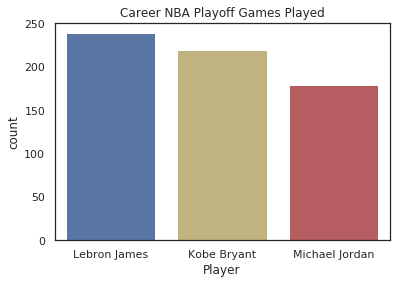

In [14]:
#set style for visualization
sns.set(style='white')

#set plot size
plt.figure(figsize=(6,4))

#plot
sns.countplot(x='Player',
              data=playoffs_mj_kb_lj,
              order= playoffs_mj_kb_lj['Player'].value_counts().index,
             palette=['b','y','r']).set_title('Career NBA Playoff Games Played')

LeBron James has played the most amount of Playoff games (thanks largely to his impressive streak of 8 straight NBA Finals appearances from 2011 to 2018)

# 1) Playoff Points Per Game Comparison
Let's start with basic points per game and scoring distribution comparisons

Text(0.5, 1.0, 'Playoff Points Per Game')

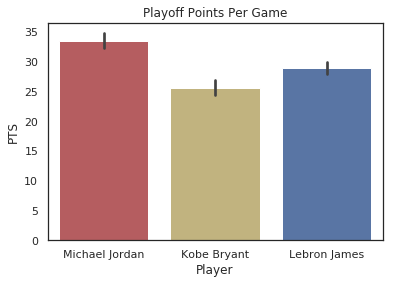

In [15]:
#compare playoff points per game averages bar plot
sns.barplot(x='Player',y='PTS',data=playoffs_mj_kb_lj,palette=['r','y','b']).set_title('Playoff Points Per Game')

Text(0.5, 1.0, 'Playoff Scoring Games')

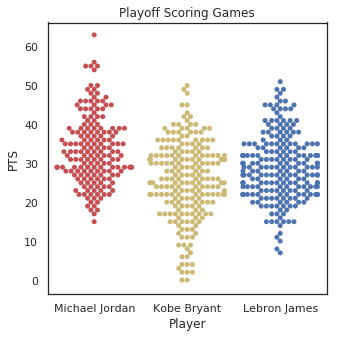

In [16]:
#career playoff scoring games distribution swarm plot

plt.figure(figsize=(5,5))
sns.swarmplot(x='Player',y='PTS',data=playoffs_mj_kb_lj,palette=['r','y','b']).set_title('Playoff Scoring Games')

Text(0.5, 1.0, 'Playoff Scoring Games')

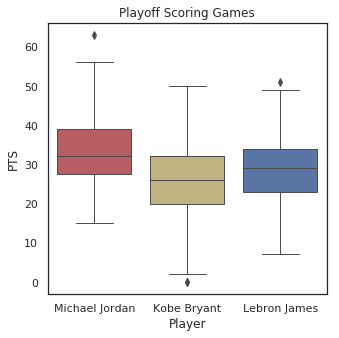

In [17]:
#career playoff scoring games distribution box plot

plt.figure(figsize=(5,5))
sns.boxplot(x='Player',y='PTS',data=playoffs_mj_kb_lj,palette=['r','y','b'],linewidth=1).set_title('Playoff Scoring Games')

Text(0.5, 1.0, 'Playoff Scoring Games')

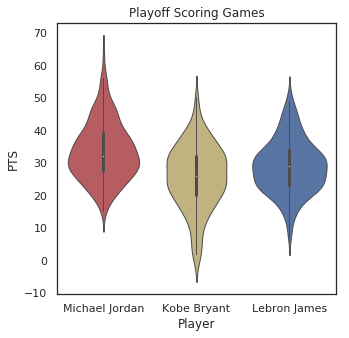

In [18]:
#career playoff scoring games distribution violin plot

plt.figure(figsize=(5,5))
sns.violinplot(x='Player',y='PTS',data=playoffs_mj_kb_lj,palette=['r','y','b'],linewidth=1).set_title('Playoff Scoring Games')

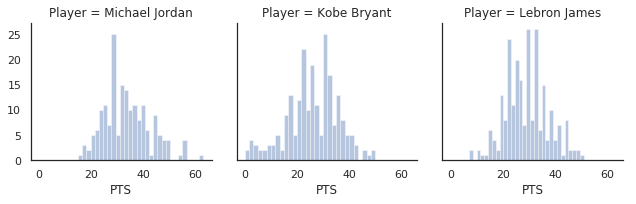

In [19]:
#career playoff scoring games distribution plot
g = sns.FacetGrid(data=playoffs_mj_kb_lj,col='Player')
g.map(sns.distplot,'PTS',bins=30,kde=False)

We will also compare average scoring performance by playoff series

with Jordan and LeBron playing in the eastern conference while Kobe playing in the west, we must change the series name values to just playoff round numbers to compare (and Finals to Round 4)

In [20]:
#replace eastern & western conference series names with just playoff round numbers
playoffs_mj_kb_lj.replace('EC1','R1',inplace = True)
playoffs_mj_kb_lj.replace('ECS','R2',inplace = True)
playoffs_mj_kb_lj.replace('ECF','R3',inplace = True)
playoffs_mj_kb_lj.replace('WC1','R1',inplace = True)
playoffs_mj_kb_lj.replace('WCS','R2',inplace = True)
playoffs_mj_kb_lj.replace('WCF','R3',inplace = True)

playoffs_mj_kb_lj.replace('FIN','R4',inplace = True)

In [21]:
#pivot points per game average by series
playoffs_by_series = playoffs_mj_kb_lj.pivot_table(values='PTS', index=['Series'], columns=['Player'], aggfunc=np.mean)

#reorder rows
playoffs_by_series= playoffs_by_series.reindex(['R1','R2','R3','R4'])

#reorder columns
columnsTitles = ['Michael Jordan', 'Kobe Bryant', 'Lebron James']
playoffs_by_series = playoffs_by_series.reindex(columns=columnsTitles)

playoffs_by_series

Player,Michael Jordan,Kobe Bryant,Lebron James
Series,,,
R1,36.782609,25.175676,29.677419
R2,32.509434,25.562500,28.101449
R3,31.022222,26.755556,29.644068
R4,33.600000,25.324324,28.224490


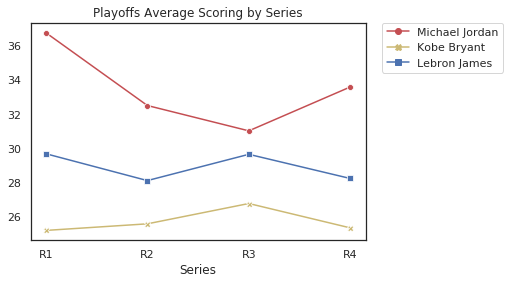

In [22]:
sns.lineplot(data=playoffs_by_series,palette=['r','y','b'],
             dashes=False,markers=True).set_title('Playoffs Average Scoring by Series')

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

All three players have dominated scoring in the playoffs. 

# 2) Playoff scoring though the years

Since early in their careers, these three players have participated in multiple playoff games. 

We will observe the changes of scoring numbers throughout the years

In [23]:
#convert date column to date time format
playoffs_mj_kb_lj['Date'] = pd.to_datetime(playoffs_mj_kb_lj['Date'])

#create year column
playoffs_mj_kb_lj['Year'] = playoffs_mj_kb_lj['Date'].apply(lambda time: time.year)

In [24]:
#create a pivot table of average playoff scoring by year
playoffs_years= playoffs_mj_kb_lj.pivot_table(values='PTS', index=['Year'], columns=['Player'], aggfunc=np.mean)
columnsTitles = ['Michael Jordan', 'Kobe Bryant', 'Lebron James']
playoffs_years = playoffs_years.reindex(columns=columnsTitles)
playoffs_years

Player,Michael Jordan,Kobe Bryant,Lebron James
Year,,,
1985,29.250000,NaN,NaN
1986,43.666667,NaN,NaN
1987,35.666667,NaN,NaN
1988,36.300000,NaN,NaN
1989,34.764706,NaN,NaN
1990,36.687500,NaN,NaN
1991,31.117647,NaN,NaN
1992,34.500000,NaN,NaN
1993,35.052632,NaN,NaN


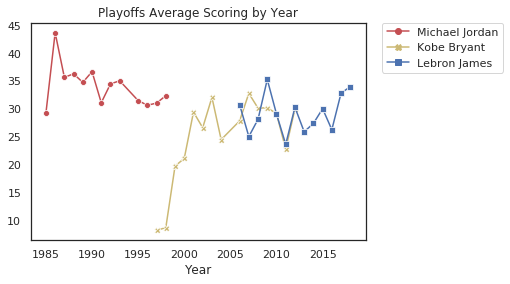

In [25]:
sns.lineplot(data=playoffs_years,palette=['r','y','b'],
             dashes=False,markers=True).set_title('Playoffs Average Scoring by Year')

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [26]:
#plot points scored by year
px.scatter(playoffs_mj_kb_lj,x='Date',y='PTS',color='Player',color_discrete_sequence=['red','gold','blue'])

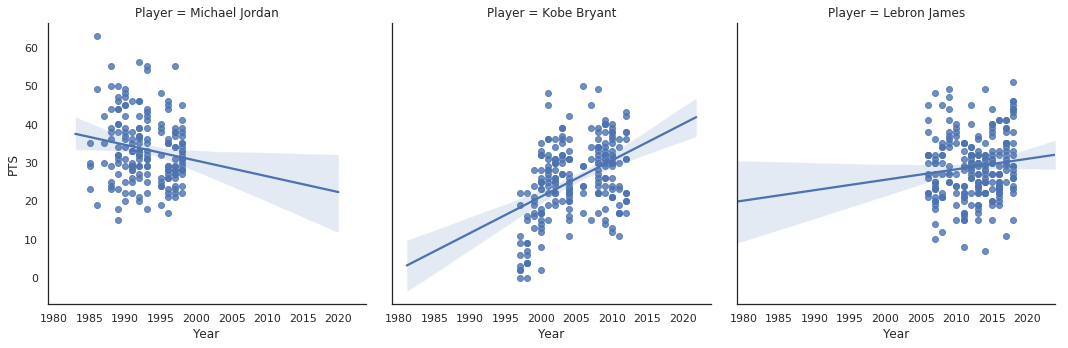

In [27]:
#visualize a linear model plot for playoff scoring by year
sns.lmplot(x='Year',y='PTS',data=playoffs_mj_kb_lj,col='Player')

Some observations: 
* **Jordan**: MJ put up monsterous scoring numbers in his early years but those early averages are on a small sample size as his teams would be eliminated in early rounds. As he adopted the triangle offense system which emphasized player and ball movement, his playoff scoring averages dipped but it resulted in multiple deep runs (and championships) in the 90's 
* **Kobe**: unlike the other two players, we can clearly see that Kobe Bryant was *not* the number 1 scoring option for his team in his early years (beginning of Kobe/Shaq era) but became a brute force as he gradually reached his prime. We can see the Black Mamba taking his scoring to another level after Shaquille O'Neal left the Lakers in 2004 
* **Lebron**: LeBron's playoff scoring averages have been fairly consistent compared to the two above and continues to be dominant even to this day

# 3) NBA Finals Points Per Game Comparison
we will now be comparing scoring performances in the NBA's biggest stage

In [28]:
#filter and create a dataframe of NBA Finals data only
finals_mj_kb_lj = playoffs_mj_kb_lj[playoffs_mj_kb_lj['Series'] == 'R4']

In [29]:
#number of finals games played
finals_mj_kb_lj['Player'].value_counts()

Lebron James      49
Kobe Bryant       37
Michael Jordan    35
Name: Player, dtype: int64

LeBron James has played the most NBA Finals games of the three players and his career is not over yet. It's very possible that he may make more Finals appearances in the future especially now that he has teammed up with Anthony Davis in LA for the 2019-2020 season

Text(0.5, 1.0, 'Finals Points Per Game')

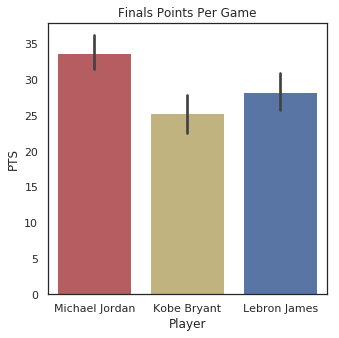

In [30]:
#compare Finals points per game averages

plt.figure(figsize=(5,5))
sns.barplot(x='Player',y='PTS',data=finals_mj_kb_lj,palette=['r','y','b']).set_title('Finals Points Per Game')

Text(0.5, 1.0, 'Finals Scoring Games')

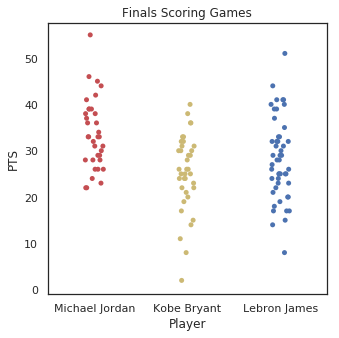

In [31]:
#career finals scoring game distribution

plt.figure(figsize=(5,5))
sns.stripplot(x='Player',y='PTS',data=finals_mj_kb_lj,palette=['r','y','b']).set_title('Finals Scoring Games')

Text(0.5, 1.0, 'Finals Scoring Games')

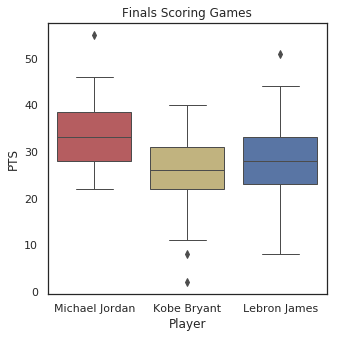

In [32]:
#career finals scoring game distribution

plt.figure(figsize=(5,5))
sns.boxplot(x='Player',y='PTS',data=finals_mj_kb_lj,palette=['r','y','b'],linewidth=1).set_title('Finals Scoring Games')

Text(0.5, 1.0, 'Finals Scoring Games')

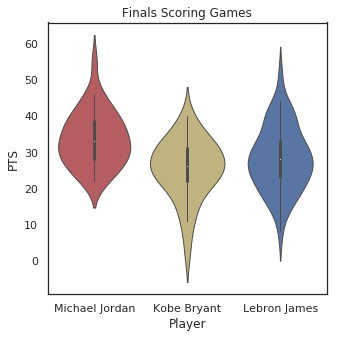

In [33]:
#career finals scoring game distribution

plt.figure(figsize=(5,5))
sns.violinplot(x='Player',y='PTS',data=finals_mj_kb_lj,palette=['r','y','b'],linewidth=1).set_title('Finals Scoring Games')

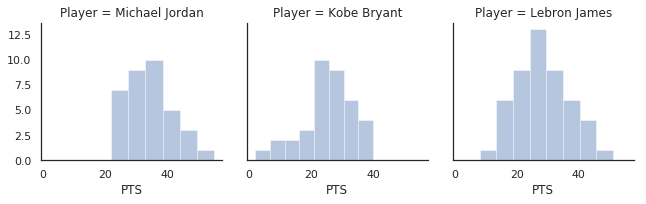

In [34]:
#career finals scoring game distribution
g = sns.FacetGrid(data=finals_mj_kb_lj,col='Player')
g.map(sns.distplot,'PTS',kde=False)

In [35]:
px.scatter(finals_mj_kb_lj,x='Date',y='PTS',color='Player',color_discrete_sequence=['red','gold','blue'])

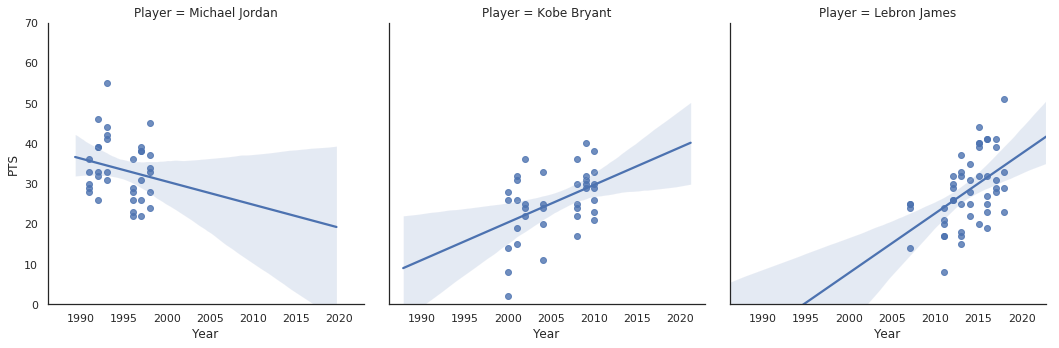

In [36]:
#visualize NBA Finals scoring by year
g= sns.lmplot(x='Year',y='PTS',data=finals_mj_kb_lj,col='Player')
g = (g.set_axis_labels("Year", "PTS").set(ylim=(0, 70)))

Even in the NBA Finals, the three players have delivered elite scoring performances. 

*Some Observations*:
* **Jordan**: Winning 6 for 6 in his NBA Finals, it seems that Jordan's scoring averages dipped as he aged during his second threepeat (still very impressive numbers)
* **Kobe**: we can clearly see the difference when Kobe was the second option to Shaq in his first 4 NBA Finals compared to when he was the first option in his next 3
* **LeBron**: LeBron has always been the man for his team but he seems to improve his scoring in the Finals as his career progresses

In the visualizations we can recall some memorable games:
* **Jordan**'s 55 points versus the Pheonix Suns in game 4 of 1993 NBA Finals
* **Kobe**'s 2 points after suffering an ankle injury in 9 minutes versus Indiana Pacers in game 2 of 2001 NBA Finals (forced to miss game 3)
* **Kobe**'s 40 points (Kobe's Finals career high) against Orlando Magic in game 1 of 2009 NBA Finals. He was on a mission that year
* **LeBron**'s 51 points versus the Golden State Warriors in game 1 of 2018 NBA Finals (lol JR Smith) 
* **LeBron**'s 8 point dud versus the Dallas Mavericks in game 4 of 2011 NBA Finals 



# 4) Scoring Methods Comparison
In this section we will analyze the different methods the three players scored in the playoffs (2 point field goal, 3 point field goal, freethrows) 

In [37]:
#create 2 point field goal column
playoffs_mj_kb_lj['2P']= playoffs_mj_kb_lj['FG']-playoffs_mj_kb_lj['3P']

In [38]:
#create column for points scored off 2 pointers; count of 2pt times 2
playoffs_mj_kb_lj['2PT'] = playoffs_mj_kb_lj['2P']*2

#create column for points scored off 3 pointers; count of 3pt times 3 
playoffs_mj_kb_lj['3PT'] = playoffs_mj_kb_lj['3P']*3

In [39]:
#create pivot table
scoring_methods = pd.pivot_table(data=playoffs_mj_kb_lj,index='Player',values=['2PT','3PT','FT'],aggfunc='mean')

#reorder rows
scoring_methods= scoring_methods.reindex(['Michael Jordan','Kobe Bryant','Lebron James'])

scoring_methods

,2PT,3PT,FT
Player,,,
Michael Jordan,22.793296,2.480447,8.173184
Kobe Bryant,15.654545,3.981818,6.000000
Lebron James,17.464435,4.644351,6.807531


In [40]:
#store values as series
Points_2Pointers = scoring_methods['2PT']
Points_3Pointers = scoring_methods['3PT']
Points_FT = scoring_methods['FT']

In [41]:
#create stacked bar chart; average Playoff Points by Scoring Method
fig = go.Figure(data=[
    go.Bar(name='2PT', x=['Michael Jordan','Kobe Bryant','Lebron James'], y=Points_2Pointers),
    go.Bar(name='3PT', x=['Michael Jordan','Kobe Bryant','Lebron James'], y=Points_3Pointers),
    go.Bar(name='FT', x=['Michael Jordan','Kobe Bryant','Lebron James'], y=Points_FT)])

# Change the bar mode
fig.update_layout(barmode='stack',title='Average Playoff Scoring by Method')
fig.show()

From the visualization above, we can see the average scoring methods of the three players
* **Michael Jordan** MJ only scored a small portion of his points through 3 point field goals. 3 pointers were not exactly his strengths and he played in an era before long range volume shooting became popular. He averaged 2.48 points off of 3 pointers meaning that he averaged under 1 3 pointer made per playoff game. He also averaged the most points off of free throws of the three players
* **Lebron James** LeBron averaged the most points off of 3 pointers of the three players

Unfortunately with the dataset we currently possess, we cannot identify how many of the 2 point field goals were jump shots, layups, or dunks. 

# 5) Correlation with other stats
here we will compare points scored with other recorded stats to see if we can find any notable insight

## i) Scoring vs. Assists

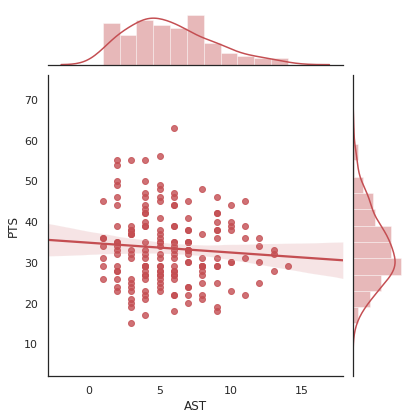

In [42]:
#Michael Jordan points scored vs. assists
sns.jointplot(x='AST',y='PTS',data=mj_playoffs,color='r',kind='reg')

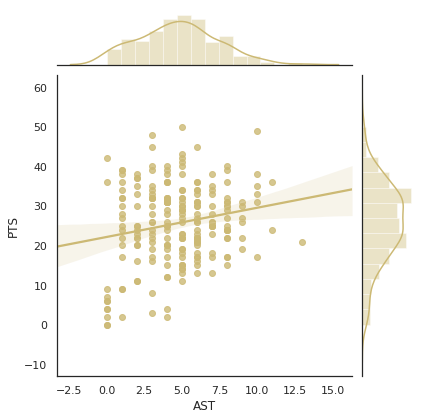

In [43]:
#Kobe Bryant points scored vs. assists
sns.jointplot(x='AST',y='PTS',data=kobe_playoffs,color='y',kind='reg')

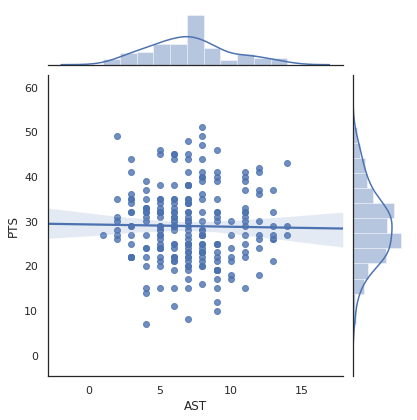

In [44]:
#LeBron James points scored vs. assists
sns.jointplot(x='AST',y='PTS',data=lebron_playoffs,color='b',kind='reg')

Some observations: 
* **Jordan**: in the playoffs, it seems that there were many cases where Jordan sacrificed a very small bit of his scoring to set up his teammates
* **Kobe**: at a glance, it appears that Kobe's assists increase the more he scores. However, the regression line may be misleading in this case because there are numerous data points where he seemed to play limited minutes (causing low scoring and assist output) 
* **Lebron**: LeBron's scoring and assists seem almost perfectly in line. This very well reflects his balanced overall game

## ii) Scoring vs. Minutes Played

We will check the relationship between points scored versus minutes played

**Minutes Played**

In [45]:
#check the minutes played column
playoffs_mj_kb_lj['MP'].head()

0    44:00:00
1    43:00:00
2    42:00:00
3    42:00:00
4    43:00:00
Name: MP, dtype: object

In [46]:
#separate the minutes played value rounded down and store to a new column as integers
playoffs_mj_kb_lj['Minutes Played']=playoffs_mj_kb_lj['MP'].apply(lambda x: x.split(':')[0]).astype(int)

In [47]:
#pivot minutes per playoff game for each player
playoffs_mj_kb_lj.pivot_table(values='Minutes Played',index='Player',aggfunc=['min','mean','max'])

,min,mean,max
,Minutes Played,Minutes Played,Minutes Played
Player,,,
Kobe Bryant,1,39.059091,52
Lebron James,24,41.552301,53
Michael Jordan,29,41.754190,57


In [48]:
#create rough interactive scatter plot
px.scatter(playoffs_mj_kb_lj,x='Minutes Played',y='PTS',color='Player',color_discrete_sequence=['red','gold','blue'],hover_name='Date')

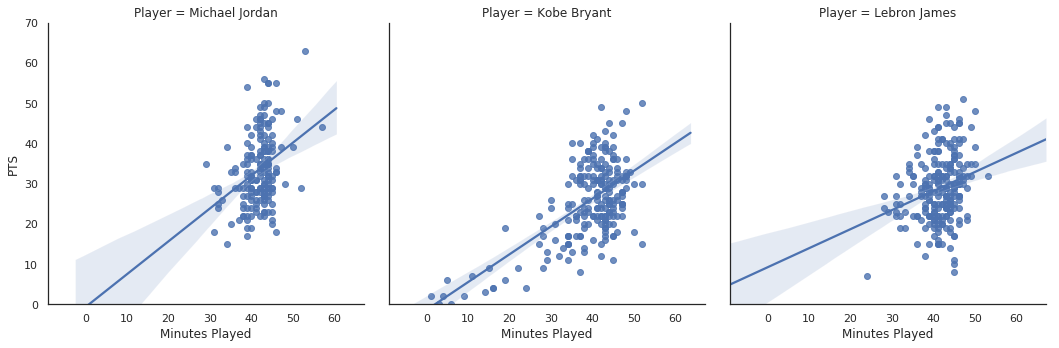

In [49]:
#plot relationship between points scored and minutes played
g= sns.lmplot(x='Minutes Played',y='PTS',data=playoffs_mj_kb_lj,col='Player')
g = (g.set_axis_labels("Minutes Played", "PTS").set(ylim=(0, 70)))

This may be an obvious fact but more minutes played generally means more points scored for all three players. 

While all three players have averaged heavy amount of minutes in the playoffs, Kobe had many games where he logged short minutes early in his career (leading to lower points scored)

**Points per minute**

another interesting stat we can add is points scored per minute of game time

In [50]:
#create points per minute column
playoffs_mj_kb_lj['PTS per Min']=(playoffs_mj_kb_lj['PTS']/playoffs_mj_kb_lj['Minutes Played'])

In [51]:
#pivot average points per minute for each player
playoffs_mj_kb_lj.pivot_table(values='PTS per Min',index='Player',aggfunc=['min','mean','max'])

,min,mean,max
,PTS per Min,PTS per Min,PTS per Min
Player,,,
Kobe Bryant,0.000000,0.652239,2.000000
Lebron James,0.177778,0.698793,1.195122
Michael Jordan,0.391304,0.801101,1.384615


In [52]:
px.scatter(playoffs_mj_kb_lj,x='Minutes Played',y='PTS per Min',color='Player',color_discrete_sequence=['red','gold','blue'],hover_name='Date')

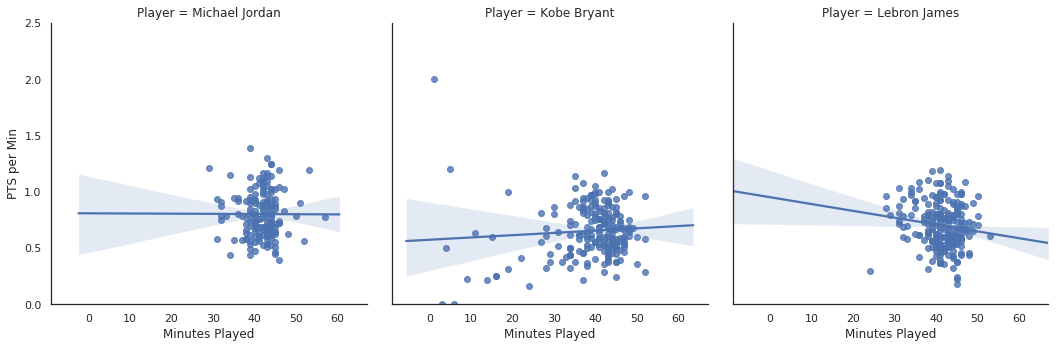

In [53]:
#plot relationship between points per minute and minutes played
g= sns.lmplot(x='Minutes Played',y='PTS per Min',data=playoffs_mj_kb_lj,col='Player')
g = (g.set_axis_labels("Minutes Played", "PTS per Min").set(ylim=(0, 2.5)))

## iii) Scoring vs. Wins
All three of these players were primary offensive weapons for their teams. Let's check out how their scoring translated to team wins

In [54]:
#Find out what the win/loss column looks like in the raw data table
winloss = playoffs_mj_kb_lj['WinLossPlusMinus']
winloss.tail()

234     W (+8)
235    L (-10)
236    L (-19)
237     L (-8)
238    L (-23)
Name: WinLossPlusMinus, dtype: object

First we must separte the win/loss plus/minus values to just win or loss

In [55]:
#return only W or L and store to a new column
wl = []
for x in winloss:
    y = x[0]
    wl += y
playoffs_mj_kb_lj['WinLoss']= wl

In [56]:
#new table
playoffs_mj_kb_lj.tail()

,+/-,3P,3P%,3PA,AST,BLK,DRB,Date,FG,FG%,...,Tm,HomeAway,WinLossPlusMinus,Year,2P,2PT,3PT,Minutes Played,PTS per Min,WinLoss
234,8.0,3.0,0.375,8.0,9.0,2.0,15.0,2018-05-27,12.0,0.500,...,CLE,Away,W (+8),2018,9.0,18.0,9.0,48,0.729167,W
235,-13.0,3.0,0.429,7.0,8.0,1.0,4.0,2018-05-31,19.0,0.594,...,CLE,Away,L (-10),2018,16.0,32.0,9.0,47,1.085106,L
236,-18.0,2.0,0.500,4.0,13.0,0.0,8.0,2018-06-03,10.0,0.500,...,CLE,Away,L (-19),2018,8.0,16.0,6.0,43,0.674419,L
237,-8.0,1.0,0.167,6.0,11.0,2.0,7.0,2018-06-06,13.0,0.464,...,CLE,Home,L (-8),2018,12.0,24.0,3.0,46,0.717391,L
238,-21.0,0.0,0.000,1.0,8.0,1.0,6.0,2018-06-08,7.0,0.538,...,CLE,Home,L (-23),2018,7.0,14.0,0.0,40,0.575000,L


In [57]:
#Points per game average in Wins vs. Losses
playoffs_mj_kb_lj.pivot_table(values='PTS', index=['Player'], columns=['WinLoss'], aggfunc=np.mean)

WinLoss,L,W
Player,,
Kobe Bryant,23.905882,26.725926
Lebron James,26.409639,30.250000
Michael Jordan,31.766667,34.294118


In [58]:
#carry over this change to each of the player tables
mj_playoffs = playoffs_mj_kb_lj[playoffs_mj_kb_lj['Player'] == 'Michael Jordan']
kobe_playoffs = playoffs_mj_kb_lj[playoffs_mj_kb_lj['Player'] == 'Kobe Bryant']
lebron_playoffs = playoffs_mj_kb_lj[playoffs_mj_kb_lj['Player'] == 'Lebron James']

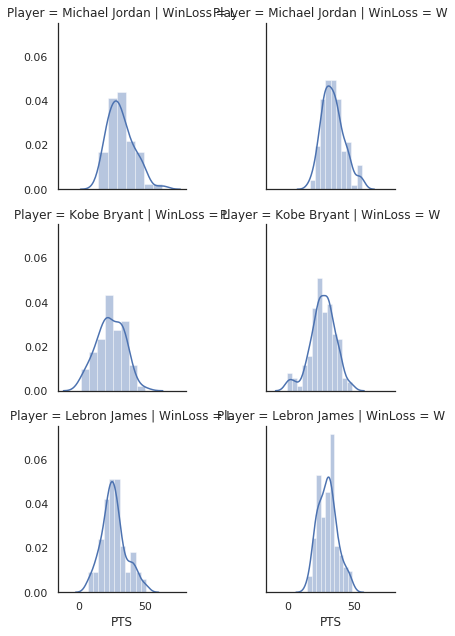

In [59]:
#Player scoring distribution during Wins vs. Losses
g = sns.FacetGrid(data=playoffs_mj_kb_lj,col='WinLoss',row='Player')
g.map(sns.distplot,'PTS')

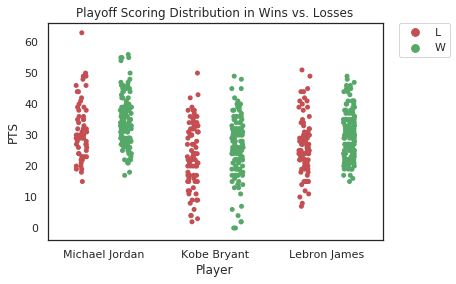

In [60]:
#Playoff scoring distribution Win vs. Loss
sns.stripplot(x='Player',y='PTS',data=playoffs_mj_kb_lj, jitter=True,hue='WinLoss',palette=['r','g'],dodge=True).set_title('Playoff Scoring Distribution in Wins vs. Losses')

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

It is clear to see that all three players average more points in the playoffs in wins than in losses. 

**Michael Jordan** and **LeBron James** in particular take their scoring to another level in wins as seen in the distribution 

## iiii) Scoring vs. Home/Away
In this section, we will see if playing in home games versus away games have any impact on the scoring performances of these three players 

In [61]:
#Points per game average in home vs. away
playoffs_mj_kb_lj.pivot_table(values='PTS', index=['Player'], columns=['HomeAway'], aggfunc=np.mean)

HomeAway,Away,Home
Player,,
Kobe Bryant,25.796296,25.482143
Lebron James,29.093220,28.743802
Michael Jordan,32.976471,33.872340


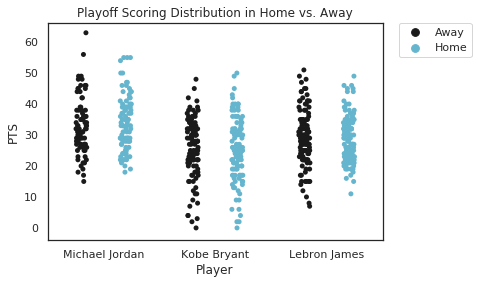

In [62]:
#Playoff scoring distribution home vs. away
sns.stripplot(x='Player',y='PTS',data=playoffs_mj_kb_lj, jitter=True,hue='HomeAway',palette=['k','c'],dodge=True).set_title('Playoff Scoring Distribution in Home vs. Away')

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Kobe Bryant**'s playoff scoring stats and distribution seem almost identical whether he plays home or away. 

On the other hand, it is interesting to note that both **Michael Jordan** and **LeBron James** have put up some of their best individual playoff scoring performances in away games (**Jordan**'s 63 points versus Larry Bird's Celtics, **LeBron**'s 51 versus Golden State Warriors with 4 All Stars)

## iiiii) Scoring vs. Field goal Percentage and Attempts

Playoff scoring will be observed next to the field goal percentage

In [63]:
#pivot average points per minute for each player
playoffs_mj_kb_lj.pivot_table(values='FG%',index='Player',aggfunc=['min','mean','max'])

,min,mean,max
,FG%,FG%,FG%
Player,,,
Kobe Bryant,0.143,0.452523,1.000
Lebron James,0.111,0.491540,0.846
Michael Jordan,0.167,0.484570,0.833


In [64]:
#plot field goal % vs points scored
px.scatter(playoffs_mj_kb_lj,x='FG%',y='PTS',color='Player',color_discrete_sequence=['red','gold','blue'],hover_name='Date')

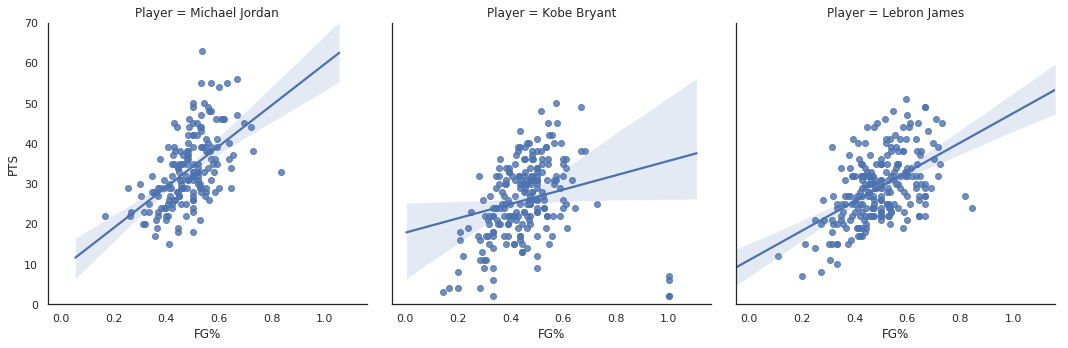

In [65]:
#plot relationship between points scored and field goal %
g= sns.lmplot(x='FG%',y='PTS',data=playoffs_mj_kb_lj,col='Player')
g = (g.set_axis_labels("FG%", "PTS").set(ylim=(0, 70)))

**True Shooting Percentage**

True shooting percentage is a statistic that is used to find a more accurate representation of a player’s shooting percentage than the more basic stats. The formula to calculate this is as follows

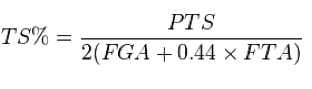

In [66]:
playoffs_mj_kb_lj['True Shooting %'] = playoffs_mj_kb_lj['PTS']/(2*(playoffs_mj_kb_lj['FGA']+0.44*playoffs_mj_kb_lj['FTA']))

In [67]:
#pivot average points per minute for each player
playoffs_mj_kb_lj.pivot_table(values='True Shooting %',index='Player',aggfunc=['min','mean','max'])

,min,mean,max
,True Shooting %,True Shooting %,True Shooting %
Player,,,
Kobe Bryant,0.200000,0.545660,1.166667
Lebron James,0.267857,0.580440,0.864486
Michael Jordan,0.356090,0.567916,0.835020


In [68]:
#plot true shooting % vs points scored
px.scatter(playoffs_mj_kb_lj,x='True Shooting %',y='PTS',color='Player',color_discrete_sequence=['red','gold','blue'],hover_name='Date')

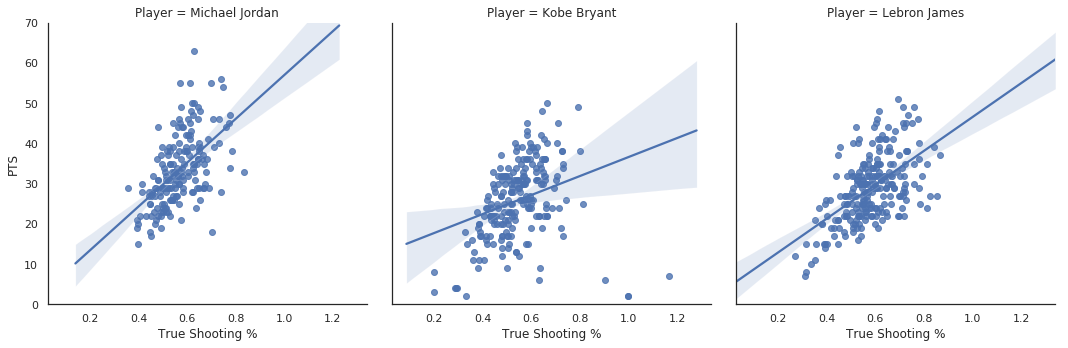

In [69]:
#plot relationship between points scored and field goal %
g= sns.lmplot(x='True Shooting %',y='PTS',data=playoffs_mj_kb_lj,col='Player')
g = (g.set_axis_labels("True Shooting %", "PTS").set(ylim=(0, 70)))

**Conclusion**

It was interesting to dive into the playoff scoring statistics for some of my favorite NBA players. 
In the future, I hope access and utilize shot chart data to statistically categorize the scoring styles of the players

Thanks for reading and feel free to leave any comments and suggestions regarding this EDA